# Úkol 1 - Swing States

1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody rank()). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou rank() je nutné použít metodu groupby().

In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

candidates = pandas.read_csv("1976-2020-president.csv")
candidates = candidates.sort_values(["year","state"])
candidates["rank"] = candidates.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)
candidates.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0


2. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.

In [8]:
winners = candidates[candidates["rank"] == 1]
winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0


3. Pomocí metody shift() přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.

In [9]:
winners["previous_year_winner"] = winners.groupby(["state"])["party_simplified"].shift(1)
winners = winners.sort_values(["state", "year"])
winners.head(10)

C:\Users\LANGBRIDGE\AppData\Local\Temp\ipykernel_22656\887361396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners["previous_year_winner"] = winners.groupby(["state"])["party_simplified"].shift(1)


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_winner
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
2411,2004,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1176394,1883415,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
2728,2008,ALABAMA,AL,1,63,41,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1266546,2099819,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
3079,2012,ALABAMA,AL,1,63,41,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,1255925,2074338,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


4. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci numpy.where() nebo metodu apply().

- pomocí numby.where()

In [10]:
winners["change"] = np.where((winners["year"] != 1976) & (winners["party_simplified"] != winners["previous_year_winner"]), 1, 0)
winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_winner,change
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN,0
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


- pomocí apply.()

In [11]:
def winner_change(row):
    if pandas.isnull(row["previous_year_winner"]):
        return 0
    elif row["party_simplified"] == row["previous_year_winner"]:
        return 0
    else:
        return 1
winners["change"] = winners.apply(winner_change, axis=1)
winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_winner,change
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN,0
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


Zobrazení na státě Ohio:

In [12]:
winners[winners["state"] == "OHIO"]

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_year_winner,change
228,1976,OHIO,OH,39,31,24,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,2009959,4110456,20210113,NaN,DEMOCRAT,1.0,NaN,0
584,1980,OHIO,OH,39,31,24,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,2206545,4283603,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
917,1984,OHIO,OH,39,31,24,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,2678559,4563235,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1215,1988,OHIO,OH,39,31,24,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,2416549,4393585,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1566,1992,OHIO,OH,39,31,24,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,1984942,4939967,20210113,NaN,DEMOCRAT,1.0,REPUBLICAN,1
1930,1996,OHIO,OH,39,31,24,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,2148222,4534434,20210113,NaN,DEMOCRAT,1.0,DEMOCRAT,0
2297,2000,OHIO,OH,39,31,24,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2350363,4701998,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
2635,2004,OHIO,OH,39,31,24,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2859764,5627903,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
2975,2008,OHIO,OH,39,31,24,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,2940044,5708350,20210113,NaN,DEMOCRAT,1.0,REPUBLICAN,1
3302,2012,OHIO,OH,39,31,24,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,2827621,5580822,20210113,NaN,DEMOCRAT,1.0,DEMOCRAT,0


5. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.

In [13]:
states_grouped = winners.groupby("state")["change"].sum()
states_grouped = pandas.DataFrame(states_grouped)
states_grouped = states_grouped.sort_values("change", ascending=False)
states_grouped.head(20)

,change
state,
OHIO,5
FLORIDA,5
GEORGIA,4
WISCONSIN,4
IOWA,4
PENNSYLVANIA,4
NEVADA,3
TENNESSEE,3
LOUISIANA,3


Státy z opačného konce spektra - kde svou volbu nemění:

In [14]:
no_change_states = states_grouped[states_grouped["change"] == 0]
no_change_states

,change
state,
UTAH,0
DISTRICT OF COLUMBIA,0
IDAHO,0
NORTH DAKOTA,0
KANSAS,0
SOUTH DAKOTA,0
MINNESOTA,0
ALASKA,0
NEBRASKA,0


6. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Text(0, 0.5, 'Number of changes')

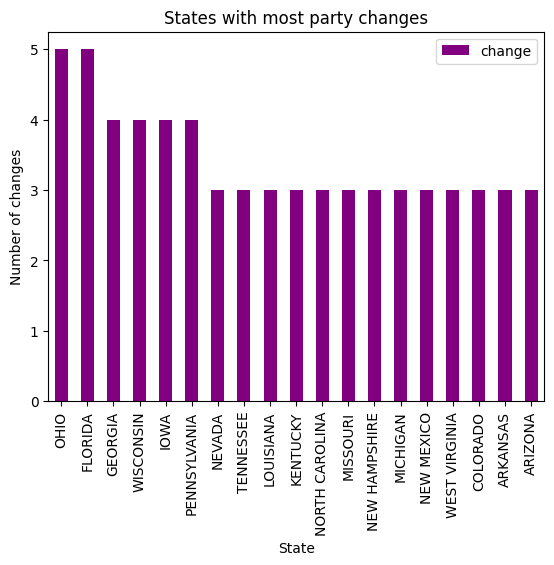

In [15]:
top_swinging_states = states_grouped[states_grouped["change"] >= 3]
top_swinging_states.plot(kind="bar", color="purple", title="States with most party changes")
plt.xlabel("State")
plt.ylabel("Number of changes")

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

In [16]:
top_two_candidates = candidates[candidates["rank"] <= 2].sort_values(["year", "state", "rank"])
top_two_candidates.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,2.0
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0


1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

In [17]:
top_two_candidates["runner_up_votes"] = top_two_candidates.groupby(["state", "year"])["candidatevotes"].shift(-1)
top_two_candidates["abs_diff"] = top_two_candidates["candidatevotes"] - top_two_candidates["runner_up_votes"]
top_two_candidates.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,runner_up_votes,abs_diff
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0,NaN,NaN
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,2.0,NaN,NaN
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0


2. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [18]:
presidents = top_two_candidates.dropna(subset=["runner_up_votes", "abs_diff"])
presidents["relative_margin"] = presidents["abs_diff"] / presidents["totalvotes"]
presidents.head()

C:\Users\LANGBRIDGE\AppData\Local\Temp\ipykernel_22656\404080652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presidents["relative_margin"] = presidents["abs_diff"] / presidents["totalvotes"]


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,runner_up_votes,abs_diff,relative_margin
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0,0.222514
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0,0.165662
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0,0.300574
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0,0.017935


3. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

In [19]:
presidents = presidents.sort_values("relative_margin", ascending=True).reset_index()
presidents.head()

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,runner_up_votes,abs_diff,relative_margin
0,2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
1,2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",DEMOCRAT,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
2,2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
3,479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
4,241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663


In [20]:
f"Nejtěsnější výsledek voleb byl v roce {presidents.loc[0]['year']} ve státě {presidents.loc[0]['state']}."

'Nejtěsnější výsledek voleb byl v roce 2000 ve státě FLORIDA.'

4. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [21]:
winners_cleared = winners.drop(winners[winners["year"] == 1976].index).sort_values(["state", "year"])
def swing(row):
    if row["previous_year_winner"] == "DEMOCRAT" and row["party_simplified"] == "REPUBLICAN":
        return "swing to Rep."
    elif row["previous_year_winner"] == "REPUBLICAN" and row["party_simplified"] == "DEMOCRAT":
        return "swing to Dem."
    else:
        return "no swing"
winners_cleared["swing"] = winners_cleared.apply(swing, axis=1)
swings_pivot = pandas.pivot_table(data=winners_cleared, values="change", index="year", columns="swing", aggfunc=len, fill_value=0)
swings_pivot

swing,no swing,swing to Dem.,swing to Rep.
year,,,
1980,35,0,16
1984,45,0,6
1988,42,9,0
1992,29,22,0
1996,46,2,3
2000,40,0,11
2004,48,1,2
2008,42,9,0
2012,49,0,2
